<a href="https://colab.research.google.com/github/vikramkrishnan9885/MyColab/blob/master/MultiImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.image-net.org/

We'll use the STL-10 dataset provided in the PyTorch torchvision package. There are 10 classes in the dataset:

* Airplane: 0
* Bird: 1
* Car: 2
* Cat: 3
* Deer: 4
* Dog: 5
* Horse:6
* Monkey: 7
* Ship: 8
* Truck: 9

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
import os

path2data="./data"
if not os.path.exists(path2data):
    os.mkdir(path2data)
    
data_transformer = transforms.Compose([transforms.ToTensor()])
train_ds=datasets.STL10(path2data, split='train', 
                        download=True,transform=data_transformer)
print(train_ds.data.shape)

Extracting ./data/stl10_binary.tar.gz to ./data
(5000, 3, 96, 96)


In [2]:
import collections

y_train=[y for _,y in train_ds]
counter_train=collections.Counter(y_train)
print(counter_train)

Counter({1: 500, 5: 500, 6: 500, 3: 500, 9: 500, 7: 500, 4: 500, 8: 500, 0: 500, 2: 500})


In [3]:
test0_ds=datasets.STL10(
    path2data, 
    split='test', 
    download=True,
    transform=data_transformer
)
print(test0_ds.data.shape)

Files already downloaded and verified
(8000, 3, 96, 96)


In [4]:
# Next, split the indices of test0_ds into two groups:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=list(range(len(test0_ds)))
y_test0=[y for _,y in test0_ds]
for test_index, val_index in sss.split(indices, y_test0):
    print("test:", test_index, "val:", val_index)
    print(len(val_index),len(test_index))

test: [2096 4321 2767 ... 3206 3910 2902] val: [6332 6852 1532 ... 5766 4469 1011]
1600 6400


In [0]:
# Then create two datasets from test0_ds:
from torch.utils.data import Subset

val_ds=Subset(test0_ds,val_index)
test_ds=Subset(test0_ds,test_index)

In [6]:
# Next, count the number of images per class in val_ds and test_ds:
import collections
import numpy as np

y_test=[y for _,y in test_ds]
y_val=[y for _,y in val_ds]

counter_test=collections.Counter(y_test)
counter_val=collections.Counter(y_val)
print(counter_test)
print(counter_val)

Counter({6: 640, 0: 640, 4: 640, 5: 640, 9: 640, 2: 640, 3: 640, 1: 640, 7: 640, 8: 640})
Counter({2: 160, 8: 160, 3: 160, 6: 160, 4: 160, 1: 160, 5: 160, 9: 160, 0: 160, 7: 160})


In [0]:
# Let's show a few sample images from train_ds. We will import the required packages:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(0)

In [9]:
# Now, we will define the helper function:

def show(img,y=None,color=True):
    npimg = img.numpy()
    npimg_tr=np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)
    if y is not None:
        plt.title("label: "+str(y))

# Then pick random samples:
grid_size=4
rnd_inds=np.random.randint(0,len(train_ds),grid_size)
print("image indices:",rnd_inds)

image indices: [2732 2607 1653 3264]


In [10]:
# We will create a grid from the sample images:

x_grid=[train_ds[i][0] for i in rnd_inds]
y_grid=[train_ds[i][1] for i in rnd_inds]

x_grid=utils.make_grid(x_grid, nrow=4, padding=1)
print(x_grid.shape)

torch.Size([3, 98, 389])


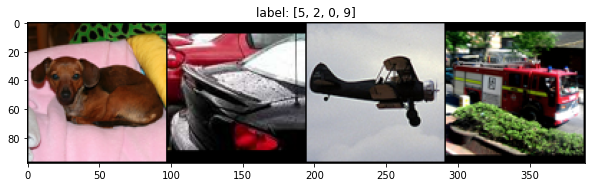

In [11]:
# Then, we will call the helper function to display the grid:

# call helper function
plt.figure(figsize=(10,10))
show(x_grid,y_grid)